In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, InputLayer
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import cv2
import os

In [2]:
!unzip "/content/drive/MyDrive/Dataset1/Copy of train_nLPp5K8 (1).zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/5249.jpg         
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         

In [2]:
test=pd.read_csv("/content/drive/MyDrive/Dataset1/Copy of test_fkwGUNG (1).csv")

In [3]:
test.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [4]:
images_path="/content/images"
image_files = os.listdir(images_path)

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Dataset1/train.csv')

In [6]:
seed = 42
rng = np.random.RandomState(seed)

In [7]:
data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [8]:
# Load the CSV file with image labels
csv_file_path = '/content/drive/MyDrive/Dataset1/train.csv'
df = pd.read_csv(csv_file_path)
# Specify the folder containing images
image_folder ="/content/images"

In [9]:

from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_data, validation_data, train_labels, validation_labels = train_test_split(
    df['image_names'], df['class'], test_size=0.2, random_state=42)

In [10]:
import cv2

# Define a function to preprocess an image
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    return image

In [11]:
def custom_data_generator(file_paths, labels, batch_size, target_size, shuffle=True):
    num_samples = len(file_paths)
    num_batches = num_samples // batch_size
    index_array = np.arange(num_samples)

    while True:
        if shuffle:
            np.random.shuffle(index_array)

        for batch_index in range(num_batches):
            batch_indices = index_array[batch_index * batch_size : (batch_index + 1) * batch_size]
            batch_data = []
            batch_labels = []

            for idx in batch_indices:
                image_path = os.path.join(image_folder, file_paths.iloc[idx])
                image = preprocess_image(image_path, target_size)
                label = labels.iloc[idx]
                batch_data.append(image)
                batch_labels.append(label)

            yield np.array(batch_data), np.array(batch_labels)

batch_size = 32
target_size = (224, 224)
train_data_generator = custom_data_generator(train_data, train_labels, batch_size,target_size)

validation_data_generator = custom_data_generator(validation_data, validation_labels, batch_size, target_size)


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


num_epochs =20

# Fit the model to your training data
history = model.fit(
    train_data_generator,
    steps_per_epoch=len(train_data) // batch_size,
    epochs=num_epochs,
    validation_data=validation_data_generator,
    validation_steps=len(validation_data) // batch_size,
)


Epoch 1/20
304/304 [==============================] - 44s 105ms/step - loss: 0.5924 - accuracy: 0.6795 - val_loss: 0.4886 - val_accuracy: 0.7586
Epoch 2/20
304/304 [==============================] - 28s 93ms/step - loss: 0.4886 - accuracy: 0.7663 - val_loss: 0.4907 - val_accuracy: 0.8043
Epoch 3/20
304/304 [==============================] - 27s 89ms/step - loss: 0.4479 - accuracy: 0.7895 - val_loss: 0.4048 - val_accuracy: 0.8257
Epoch 4/20
304/304 [==============================] - 30s 98ms/step - loss: 0.4166 - accuracy: 0.8060 - val_loss: 0.3745 - val_accuracy: 0.8261
Epoch 5/20
304/304 [==============================] - 27s 88ms/step - loss: 0.3955 - accuracy: 0.8208 - val_loss: 0.3845 - val_accuracy: 0.8191
Epoch 6/20
304/304 [==============================] - 30s 98ms/step - loss: 0.3704 - accuracy: 0.8351 - val_loss: 0.3622 - val_accuracy: 0.8302
Epoch 7/20
304/304 [==============================] - 27s 89ms/step - loss: 0.3549 - accuracy: 0.8436 - val_loss: 0.3687 - val_accuracy

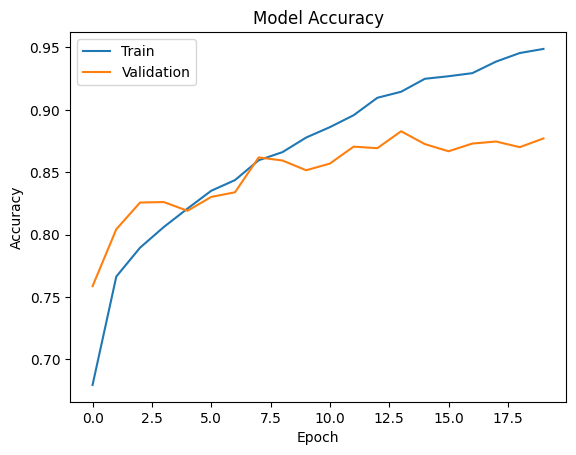

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

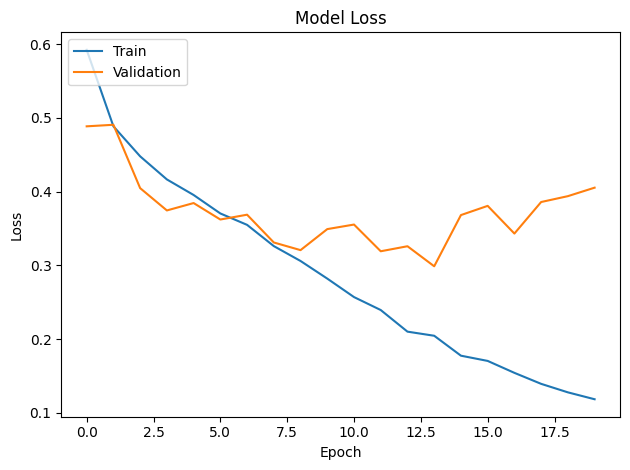

In [14]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [15]:
# Assuming 'model' is your trained Keras model
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 237ms/step


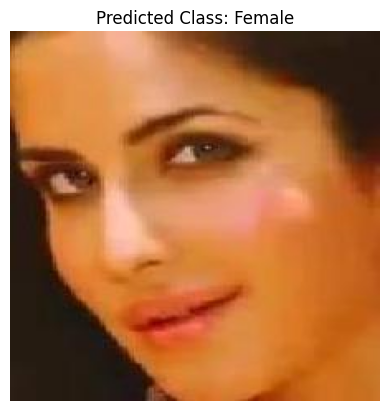

In [17]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from keras.models import load_model
# Load your trained Keras model
model = load_model("/content/model.h5")

# Load and preprocess the test image
test_image_path = "/content/images/768.jpg"  # Replace with the path to your test image
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (224, 224))
test_image = test_image / 255.0  # Normalize pixel values

test_image = np.expand_dims(test_image, axis=0)

predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

 #Map predicted class to class names
class_names = ["Female", "Male"]
predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

# Display the image with the predicted class
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title("Predicted Class: " + predicted_class_name)
plt.axis('off')
plt.show()